In [1]:
# Setup
import numpy as np

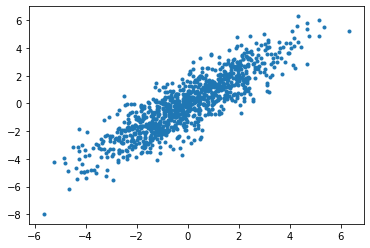

In [2]:
# Simulate Data
N = 1000
K = 10
X = np.random.normal(size = (K,N)) # according to notes, X should be a k x n matrix
E = np.random.normal(size = N)
beta = np.linspace(0,1,num=K)

Y = np.matmul(beta, X) + E

import matplotlib.pyplot as plt
plt.plot(np.matmul(beta,X),Y,'.')

In [3]:
# Question 1: 
def numpy_ols(Y, X):
    '''
    Inputs:
    Y - matrix, outcomes
    X - matrix, observations
    Output:
    beta_hat - array, coefficient relating observations to outcomes
    '''
    XX = np.matmul(X, np.transpose(X))
    XY = np.matmul(X, Y)
    beta_hat = np.linalg.solve(XX, XY)
    return beta_hat

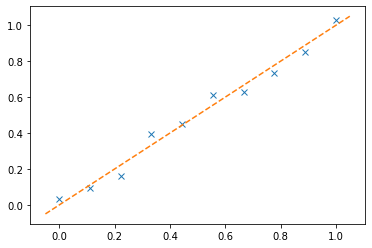

In [4]:
# Checking Answer for Question 1:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

beta_hat = numpy_ols(Y,X)
plt.plot(beta,beta_hat,'x')
abline(1,0)

Using TensorFlow backend.


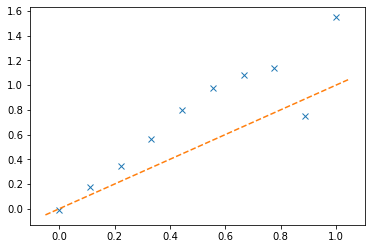

In [5]:
# Question 2: TensorFlow
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(1, input_shape=(K,)))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss ='mse')
hist = model.fit(x = np.transpose(X), y = Y, epochs=100, batch_size=50, verbose=0)
beta_keras = model.layers[0].get_weights()[0]
plt.plot(beta,beta_keras[0:K],'x')
abline(1,0)

In [6]:
def kera_linear(K):
    model_l = Sequential()
    model_l.add(Dense(1, input_shape = (K,)))
    model_l.add(Activation('linear'))
    model_l.compile(optimizer = 'adam', loss = 'mse')
    return model_l

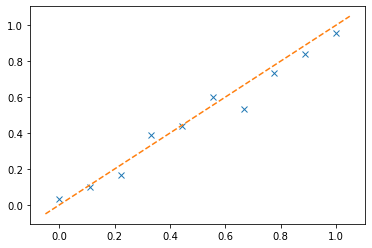

In [7]:
# Output for Question 2
model2 = kera_linear(K)
model2.compile(optimizer='adam', loss='mse')
hist2 = model2.fit(np.transpose(X), Y, epochs=100, batch_size=50, verbose=0);
beta_keras = model2.layers[0].get_weights()[0]
plt.plot(beta,beta_keras[0:K],'x')
abline(1,0)

In [8]:
hist2

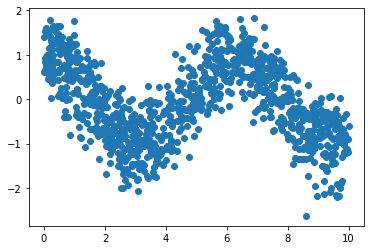

In [9]:
# Simulate Data for Non-Linearity
X_nl = 10*np.random.uniform(size = N)
Y_nl = np.cos(X_nl) + 0.5*np.random.normal(size = N)
plt.plot(X_nl,Y_nl,'o')
plt.show()

In [32]:
# Multi-layer Model
model3 = Sequential()
model3.add(Dense(20, input_shape=(1,)))
model3.add(Activation('elu'))
model3.add(Dense(1))
model3.add(Activation('elu'))
model3.add(Dense(1))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                40        
_________________________________________________________________
activation_7 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


Question 3 Verbal Answer:
Model configuration: This model consists of 3 "dense" layers. The first layer outputs 20 items and takes in tensors of shape (1,). The results of the first layer are passed through the exponential linear unit model ('elu'), and the activated results are passed into the second layer, which outputs 1 item. The result is similarly activated by the elu function and then passed into the third layer, which outputs 1 item. This is the final output of the model.

In [33]:
# Question 3
def fit_model3(model, X, Y):
    model.compile(optimizer = 'adam', loss = 'mse')
    model.fit(np.transpose(X_nl), Y, epochs=1000, batch_size=50, verbose=0)
    return model

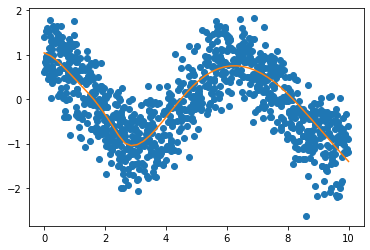

In [34]:
# Output for Question 3
model3_fin = fit_model3(model3,X_nl,Y_nl)

Xp = np.linspace(0,10,num=50)
Yp = model3_fin.predict(Xp)
plt.plot(X_nl,Y_nl,'o')
plt.plot(Xp,Yp,'-')
plt.show()

In [15]:
X_nl.shape

(1000,)